In [2]:
# 데이터 불러오기
import pandas as pd

df = pd.read_excel('/content/drive/MyDrive/고려대 미래 교육/행복요인_data.xlsx')
df.head()

,id,경제1,경제2,경제3,지식1,지식2,지식3,문화1,문화2,문화3,...,사회3,정서1,정서2,정서3,행복1,행복2,행복3,성별,연령대,거주지
0,1,5,5,4,4,4,4,3,3,3,...,2,3,3,2,3,3,3,2,5,1
1,2,2,3,2,2,2,2,2,2,1,...,4,2,2,2,3,3,3,2,5,4
2,3,2,3,2,3,3,3,5,4,3,...,3,3,2,2,3,3,3,2,5,2
3,4,4,4,3,3,3,3,4,4,3,...,5,3,4,3,4,4,4,2,4,2
4,5,3,3,3,3,3,3,4,4,5,...,1,3,3,2,2,2,2,1,1,4


In [5]:
df.columns

Index(['id', '경제1', '경제2', '경제3', '지식1', '지식2', '지식3', '문화1', '문화2', '문화3',
       '사회1', '사회2', '사회3', '정서1', '정서2', '정서3', '행복1', '행복2', '행복3', '성별',
       '연령대', '거주지'],
      dtype='object')

In [6]:
len(df.columns)

22

In [24]:
data = df
# 경제, 지식, 문화, 사회, 정서, 행복 관련 변수만 선택
data_selected = data[['경제1', '경제2', '경제3', '지식1', '지식2', '지식3', '문화1', '문화2', '문화3', '사회1', '사회2', '사회3', '정서1', '정서2', '정서3']]

# 결측치 확인
data_selected.isnull().sum()


경제1    0
경제2    0
경제3    0
지식1    0
지식2    0
지식3    0
문화1    0
문화2    0
문화3    0
사회1    0
사회2    0
사회3    0
정서1    0
정서2    0
정서3    0
dtype: int64

In [9]:
!pip install factor_analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42565 sha256=dc89c076c907ee02eb84c26523cd74a346aea69f3abe97f241d980c36e709584
  Stored in directory: /root/.cache/pip/wheels/24/59/82/6493618e30ed1cb7a013b9e1b0c9e17de80b04dfcef4ba8a4d
Successfully built factor_analyzer


In [25]:
from factor_analyzer import calculate_kmo, calculate_bartlett_sphericity

# KMO 검정
kmo_all, kmo_model = calculate_kmo(data_selected)
print(f'KMO: {kmo_model}')

# Bartlett의 구형성 검정
chi_square_value, p_value = calculate_bartlett_sphericity(data_selected)
print(f'Bartlett’s Test: chi-square = {chi_square_value}, p-value = {p_value}')


KMO: 0.7444076396840212
Bartlett’s Test: chi-square = 3115.4629925703703, p-value = 0.0


In [26]:
from sklearn.decomposition import PCA

# 주성분분석 (PCA)
pca = PCA().fit(data_selected)
eigenvalues = pca.explained_variance_
print(f'Eigenvalues: {eigenvalues}')

# 고유값 1 이상인 요인 수 결정
n_factors = sum(eigenvalues >= 1)
print(f'Number of factors: {n_factors}')


Eigenvalues: [2.67303667 2.41408624 2.14598611 1.95660002 1.26337183 0.28400441
 0.26501004 0.25054513 0.23801977 0.18993852 0.1477518  0.13089993
 0.12602365 0.11461117 0.10294636]
Number of factors: 5


In [27]:
from factor_analyzer import FactorAnalyzer

# 요인분석
fa = FactorAnalyzer(n_factors=n_factors, rotation='varimax')
fa.fit(data_selected)

# 요인 적재량 출력
loadings = fa.loadings_
print(f'Factor Loadings: \n{loadings}')
ft = pd.DataFrame(loadings, index=data_selected.columns, columns=[f'Factor{i+1}' for i in range(n_factors)])
ft

Factor Loadings: 
[[ 7.09068318e-03  3.45374184e-02  3.14199477e-02  8.25966505e-01
   2.13520430e-02]
 [-2.34167202e-02  6.08754924e-03  1.17294135e-02  9.16357018e-01
   6.21633978e-02]
 [-5.03303785e-02 -5.51282485e-02 -1.88513242e-02  8.80074650e-01
   8.80419601e-02]
 [ 8.66492962e-01  1.74829698e-02 -6.47948895e-04 -2.44193147e-02
   9.01217604e-02]
 [ 9.22583004e-01  4.16241868e-02 -1.13395877e-02 -6.67927886e-02
   1.02738283e-01]
 [ 8.88206287e-01  1.21377104e-02  9.56407171e-03  2.32148970e-02
   1.57455735e-01]
 [-3.55109975e-02  2.90136704e-02  8.24903466e-01  2.35790832e-02
   1.46811636e-01]
 [ 2.40803255e-02 -7.47372322e-03  9.25670012e-01 -1.69589216e-02
   4.85921847e-02]
 [ 1.01110623e-02 -2.06130504e-02  8.69455688e-01  1.85584373e-02
   9.71348982e-02]
 [ 1.36791611e-01 -2.25306635e-02  5.91473313e-02  5.86031434e-02
   9.32857406e-01]
 [ 1.10928740e-01 -4.41339904e-03  5.92425006e-02  4.81433316e-02
   7.51931849e-01]
 [ 8.84980840e-02 -8.92777830e-02  1.79622835e-

,Factor1,Factor2,Factor3,Factor4,Factor5
경제1,0.007091,0.034537,0.031420,0.825967,0.021352
경제2,-0.023417,0.006088,0.011729,0.916357,0.062163
경제3,-0.050330,-0.055128,-0.018851,0.880075,0.088042
지식1,0.866493,0.017483,-0.000648,-0.024419,0.090122
지식2,0.922583,0.041624,-0.011340,-0.066793,0.102738
지식3,0.888206,0.012138,0.009564,0.023215,0.157456
문화1,-0.035511,0.029014,0.824903,0.023579,0.146812
문화2,0.024080,-0.007474,0.925670,-0.016959,0.048592
문화3,0.010111,-0.020613,0.869456,0.018558,0.097135
사회1,0.136792,-0.022531,0.059147,0.058603,0.932857


In [28]:

loadings_df = pd.DataFrame(loadings, index=data_selected.columns, columns=[f'Factor{i+1}' for i in range(n_factors)])

# 요인 적재량 출력
print(loadings_df)


      Factor1   Factor2   Factor3   Factor4   Factor5
경제1  0.007091  0.034537  0.031420  0.825967  0.021352
경제2 -0.023417  0.006088  0.011729  0.916357  0.062163
경제3 -0.050330 -0.055128 -0.018851  0.880075  0.088042
지식1  0.866493  0.017483 -0.000648 -0.024419  0.090122
지식2  0.922583  0.041624 -0.011340 -0.066793  0.102738
지식3  0.888206  0.012138  0.009564  0.023215  0.157456
문화1 -0.035511  0.029014  0.824903  0.023579  0.146812
문화2  0.024080 -0.007474  0.925670 -0.016959  0.048592
문화3  0.010111 -0.020613  0.869456  0.018558  0.097135
사회1  0.136792 -0.022531  0.059147  0.058603  0.932857
사회2  0.110929 -0.004413  0.059243  0.048143  0.751932
사회3  0.088498 -0.089278  0.179623  0.063281  0.775881
정서1  0.085316  0.860416  0.000276 -0.014284 -0.019069
정서2 -0.017890  0.912067 -0.001050  0.010578 -0.059655
정서3 -0.000776  0.883100  0.001443 -0.006801 -0.034068


In [29]:
def cronbach_alpha(items_scores):
    item_vars = items_scores.var(axis=0, ddof=1)
    total_var = items_scores.sum(axis=1).var(ddof=1)
    n_items = items_scores.shape[1]
    alpha = n_items / (n_items - 1) * (1 - item_vars.sum() / total_var)
    return alpha

# 크론바흐 알파 계산
alpha = cronbach_alpha(data_selected)
print(f'Cronbach\'s Alpha: {alpha}')


Cronbach's Alpha: 0.7120106728494757


In [32]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


data = pd.read_excel('/content/drive/MyDrive/고려대 미래 교육/행복요인_data.xlsx')
data_selected = data[['경제1', '경제2', '경제3', '지식1', '지식2', '지식3', '문화1', '문화2', '문화3', '사회1', '사회2', '사회3', '정서1', '정서2', '정서3']]


scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_selected)


pca = PCA(n_components=5)
data_pca = pca.fit_transform(data_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

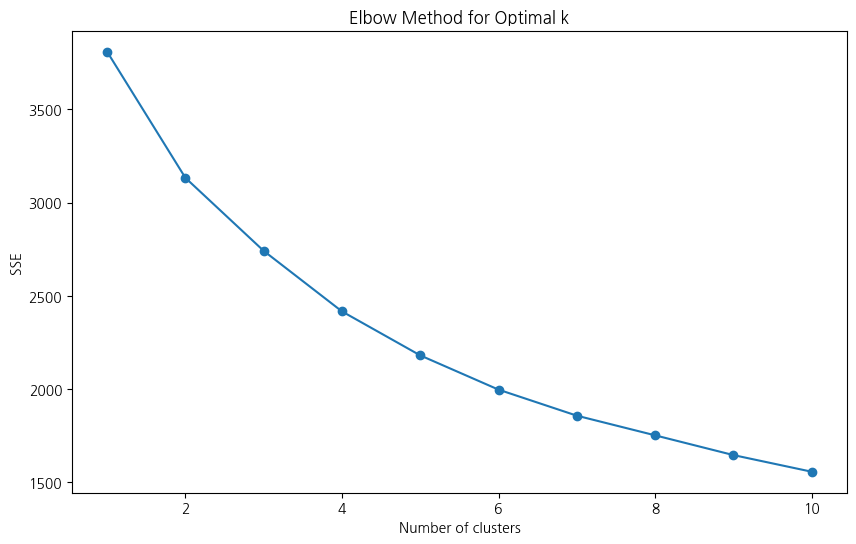

In [33]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 엘보우 방법
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_pca)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

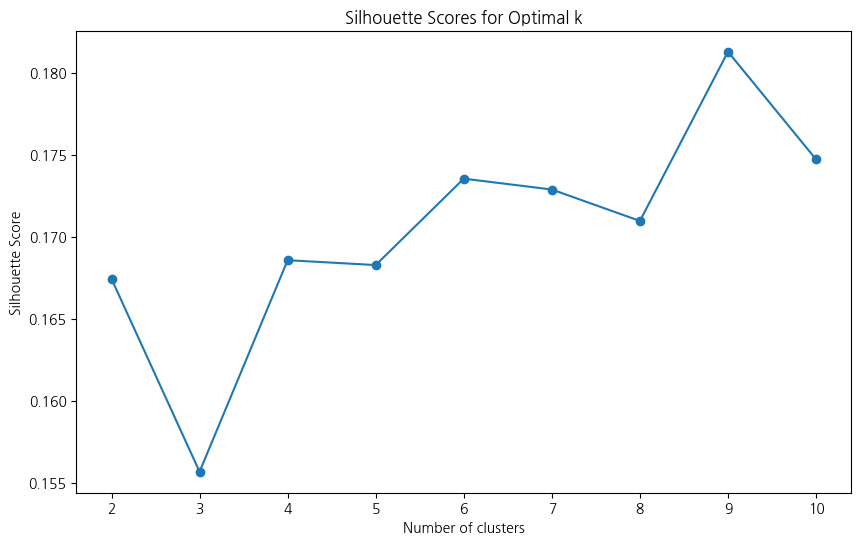

In [34]:
from sklearn.metrics import silhouette_score

# 최적의 군집 수 찾기
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_pca)
    score = silhouette_score(data_pca, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()


In [37]:

optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(data_pca)
labels = kmeans.labels_


data['Cluster'] = labels


data.head()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,id,경제1,경제2,경제3,지식1,지식2,지식3,문화1,문화2,문화3,...,정서1,정서2,정서3,행복1,행복2,행복3,성별,연령대,거주지,Cluster
0,1,5,5,4,4,4,4,3,3,3,...,3,3,2,3,3,3,2,5,1,4
1,2,2,3,2,2,2,2,2,2,1,...,2,2,2,3,3,3,2,5,4,1
2,3,2,3,2,3,3,3,5,4,3,...,3,2,2,3,3,3,2,5,2,2
3,4,4,4,3,3,3,3,4,4,3,...,3,4,3,4,4,4,2,4,2,4
4,5,3,3,3,3,3,3,4,4,5,...,3,3,2,2,2,2,1,1,4,0


In [38]:
# Google Colab에 NanumGothic 폰트 설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq


import matplotlib.font_manager as fm
import matplotlib.pyplot as plt


font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font = fm.FontProperties(fname=font_path)
fm.fontManager.addfont(font_path)
plt.rc('font', family='NanumGothic')

print("폰트 설정 완료")

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
폰트 설정 완료


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


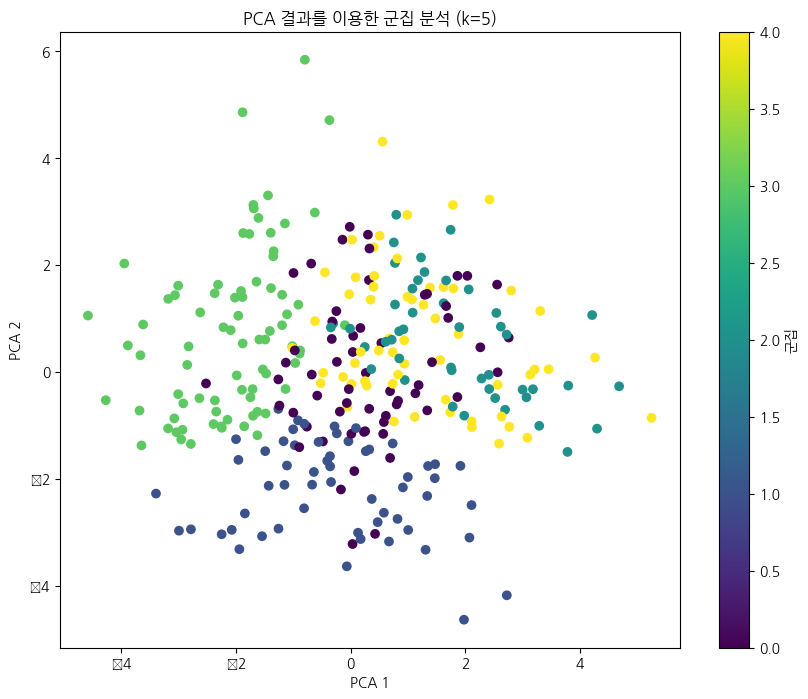

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap='viridis', marker='o')
plt.title(f'PCA 결과를 이용한 군집 분석 (k={optimal_k})')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='군집')
plt.show()

